Regression Analysis Part 02

Hult International Business School

Maching Learning - MsBA2

Professor: Chase Kusterer

Coded by Gabriela Ledesma Valenzuela

# Installing Packages & Data Preparation

Loading the necessary packages to be able to analyze our dataset as well as feature engineering

1. IMPORTING the necessary LIBRARIES

In [2]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler


# loading data
chef = pd.read_excel(io="/Users/gabyvalenzuela/Documents/31. Personal Portfolio/ML (Python)/Datasets/Apprentice_Chef_Dataset.xlsx")


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS               NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0    393.0                   1            Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0
1   1365.0                   1    Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170
2    800.0                   1     Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0
3    600.0                   1  Eleyna Westerling  eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0
4   1490.0                   1      Elyn Norridge     elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205

In [91]:
#Checking that all the values look clear (NO NAN, or "inf")
chef.describe()

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES    PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  log_PC_LOGINS  log_MEDIAN_MEAL_RATING  log_TOTAL_MEALS_ORDERED  D_CONTACTS_W_CUSTOMER_SERVICE  D_CANCELLATIONS_BEFORE_NOON  C_FAM_CHECK   D_PERSONAL  D_PROFESSIONAL       D_JUNK  PRICE_PER_MEAL  ACTIVE_PC_USER  COMMON_USER  WEEKEND_FIGHTER
count  1946.000000         1946.000000          1946.000000         1946.000000                  1946.000000                1946.000000              1946.000000    1946.000000                1946.000000               1946.000000             1946.000000  1946.000000    1946.000000  1946.000000       1946.000000      1946.000000     1946.000000          1946.000000        1946.000000         1946.000000              1946.000000         1946.000000           1946.000000          1946.000000    1946.000000             1946.000000              1946.000000                    1946.000000                  1946.000000  1946.000000  1946.000000     1946.000000  1946.000000     1946.000000     1946.000000  1946.000000      1946.000000
mean   2107.292652            0.678828            74.634121            4.904933                     6.983556                   5.383864                99.604651       0.877698                   1.404933                  0.165982                0.714286     5.515930       1.476362    11.329908          1.486125         2.970709        0.355087             0.113052         150.556578            4.437307                 0.604317            2.794964             13.508222           106.433710       0.739172                0.426955                 1.765828                       0.110997                     0.044707     0.304214     0.442446        0.357657     0.199897       36.499092        0.113566     0.691675         0.378212
std    1138.290709            0.467047            55.309782            2.502175                     2.281193                   3.044001                62.341756       0.327719                   1.549677                  0.432241                0.451870     0.580757       0.527600    13.573303          2.318599         2.744598        0.478663             0.316738          49.447180            1.549666                 0.641866            0.756528              2.333876           181.014124       0.046356                0.138740                 0.315600                       0.314209                     0.206713     0.460192     0.496804        0.479434     0.400026       19.363105        0.317365     0.461920         0.485065
min     131.000000            0.000000            11.000000            1.000000                     1.000000                   1.000000                10.330000       0.000000                   0.000000                  0.000000                0.000000     4.000000       0.000000     0.000000          0.000000         0.000000        0.000000             0.000000          33.400000            1.000000                 0.000000            1.000000              5.000000             0.000000       0.602060                0.000000                 1.041393                       0.000000                     0.000000     0.000000     0.000000        0.000000     0.000000        9.782609        0.000000     0.000000         0.000000
25%    1350.000000            0.000000            39.000000            3.000000                     5.000000                   3.000000                72.000000       1.000000                   0.000000                  0.000000                0.000000     5.000000       1.000000     1.000000          0.000000         1.000000        0.000

2. UDF FOR THE OPTIMAL NEIGHBORS

In [3]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [4]:
df_corr = chef.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PC_LOGINS                      0.04
MASTER_CLASSES_ATTENDED        0.04
PACKAGE_LOCKER                 0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
LARGEST_ORDER_SIZE             0.02
EARLY_DELIVERIES               0.02
TOTAL_MEALS_ORDERED            0.01
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
LATE_DELIVERIES                0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
CANCELLATIONS_AFTER_NOON      -0.05
MOBILE_LOGINS                 -0.05
Name: CROSS_SELL_SUCCESS, dtype: float64

In [ ]:
# We can see from the correlation graph that CANCELLATIONS_BEFORE_NOON is the variable
# that has the highest importance within this dataset, and that MOBILE_LOGINS is the one 
# with the highest negative correlation, but not the most important

3. FEATURE ENGINEERING

    3.a Creating some LOG transformations

In [5]:
#Transforming data to LOG

# Log transforming values and saving them to the dataset

chef['log_PC_LOGINS'] = np.log10(chef['PC_LOGINS'])

chef['log_MEDIAN_MEAL_RATING'] = np.log10(chef['MEDIAN_MEAL_RATING']) 

chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])


In [ ]:
# After reviewing some other log variables and displaying some models, these 3 variables
# seemed good to keep as they were used further in the LOG REG model

    3.b Creating dummy variables based on their behavior with 'CROSS_SELL_SUCCESS'

In [6]:
# Creating dummy variables "D" 
chef['D_CONTACTS_W_CUSTOMER_SERVICE']     = 0  #10 Limit to which the dummy variable will be created

chef['D_CANCELLATIONS_BEFORE_NOON']       = 0  #4 Limit to which the dummy variable will be created

# Iterating over each original column to
# Change values in the new feature columns
for index, value in chef.iterrows():

    # CONTACTS_W_CUSTOMER_SERVICE
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:  
        chef.loc[index, 'D_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
    # CANCELLATIONS_BEFORE_NOON
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 4:
        chef.loc[index, 'D_CANCELLATIONS_BEFORE_NOON'] = 1      

Checking that the variables have been created and getting their names to use them further on

In [7]:
# Checking that all the new variables are being created
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_PC_LOGINS', 'log_MEDIAN_MEAL_RATING', 'log_TOTAL_MEALS_ORDERED', 'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_CANCELLATIONS_BEFORE_NOON'], dtype='object')

In [8]:
#Some variables that didn't add anything to the model
#Feature Engineered variables that weren't representative
#chef['C_UNIQ_PROMO'] = chef['TOTAL_MEALS_ORDERED'] + chef['UNIQUE_MEALS_PURCH']
#chef['C_TIME SPENT'] = chef['PRODUCT_CATEGORIES_VIEWED'] + chef['AVG_TIME_PER_SITE_VISIT']
#chef['C_READINESS'] = chef['MEDIAN_MEAL_RATING'] + chef['AVG_PREP_VID_TIME']
#chef['C_CX'] = chef['CONTACTS_W_CUSTOMER_SERVICE'] + chef['MOBILE_NUMBER']

    3.c Creating a new dummy variable associated with the NAME of the customer

In [9]:
# List to check family names and first names
chef['C_FAM_CHECK'] = 0

# Looping over each email address
for index, col in chef.iterrows():
    if chef.loc[index,'FIRST_NAME'] == chef.loc[index, 'FAMILY_NAME']:
        chef.loc[index, 'C_FAM_CHECK'] = 1

    3. d Creating dummy variables for the emails

In [10]:
# Placeholder list
placeholder_lst = []

# Looping over each email address
for index, col in chef.iterrows():
    
    # Splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # Appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# Displaying the results
email_df

# Renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domains']


# Concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['personal_email_domains']],
                     axis = 1)

In [11]:
# Email domain types
professional_email_domains = ['@mmm.com', '@amex.com','@apple.com','@boeing.com',
                             '@caterpillar.com', '@chevron.com','@cisco.com','@cocacola.com',
                             '@disney.com','@dupont.com','@exxon.com','@ge.org',
                             '@goldmansacs.com','@homedepot.com', '@ibm.com','@intel.com',
                             '@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com',
                             '@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com',
                              '@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
junk_email_domains  = ['@me.com','@aol.com','@hotmail.com', '@live.com','@msn.com','@passport.com']

personal_email_domains  = ['@gmail.com','@yahoo.com','@protonmail.com']
 
 

# placeholder list
placeholder_lst = []


# Looping to group observations by domain type
for domain in chef['personal_email_domains']:
    
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('PROFESSIONAL')
        

    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('JUNK')
        
    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('PERSONAL')


    else:
            print('Unknown')


# Concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# Checking results
chef['domain_group'].value_counts()

PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: domain_group, dtype: int64

In [12]:
# Looping to group observations by domain type
chef['D_PERSONAL']           = 0  #10 

chef['D_PROFESSIONAL']       = 0  #4

chef['D_JUNK']               = 0  #4

for index, value in chef.iterrows():
    
    if chef.loc[index,'domain_group'] == "PERSONAL":
        chef.loc[index, 'D_PERSONAL'] = 1
    
    if chef.loc[index,'domain_group'] == "PROFESSIONAL":
        chef.loc[index, 'D_PROFESSIONAL'] = 1
    
    if chef.loc[index,'domain_group'] == "JUNK":
        chef.loc[index, 'D_JUNK'] = 1        

In [ ]:
#The created variables regarding emails will be used to check if they add relevance to the model
#considering that one will have to left out in order to avoid collinearity within the model

In [13]:
#Checking again the model
chef.head(3)

REVENUE  CROSS_SELL_SUCCESS             NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  log_PC_LOGINS  log_MEDIAN_MEAL_RATING  log_TOTAL_MEALS_ORDERED  D_CONTACTS_W_CUSTOMER_SERVICE  D_CANCELLATIONS_BEFORE_NOON  C_FAM_CHECK personal_email_domains  domain_group  D_PERSONAL  D_PROFESSIONAL  D_JUNK
0    393.0                   1          Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0       0.698970                0.000000                 1.146128                              1                            0            1       unitedhealth.com  PROFESSIONAL           0               1       0
1   1365.0                   1  Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170       0.698970                0.477121                 1.939519                              0                            0            0                 ge.org  PROFESSIONAL           0               1       0
2    800.0                   1   Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0       0.778151                0.301030                 1.176091                              1                            0            0                jnj.com  PROFESSIONAL           0               1       0

Other trials

In [14]:
#Creating other extra variables to the model
chef['PRICE_PER_MEAL'] = chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']

chef['ACTIVE_PC_USER']  = 0 # People that buy by computer

chef['COMMON_USER']     = 0 # Part of the 75% that pay by app

chef['WEEKEND_FIGHTER'] = 0 # People that pay more for food

In [15]:
for index, value in chef.iterrows():
    
    if chef.loc[index,'PC_LOGINS'] > 5 and chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 99.6 and \
        chef.loc[index, 'MOBILE_LOGINS'] <= 1.4:
            chef.loc[index, 'ACTIVE_PC_USER'] = 1
        
    if chef.loc[index,'PRICE_PER_MEAL'] >= 25:
        chef.loc[index, 'COMMON_USER'] = 1
    
    if chef.loc[index,'TOTAL_MEALS_ORDERED'] <= 60 and chef.loc[index, 'PRICE_PER_MEAL'] > 34 :
        chef.loc[index, 'WEEKEND_FIGHTER'] = 1


In [16]:
#Checking again all variables
chef.head(3)

REVENUE  CROSS_SELL_SUCCESS             NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  log_PC_LOGINS  log_MEDIAN_MEAL_RATING  log_TOTAL_MEALS_ORDERED  D_CONTACTS_W_CUSTOMER_SERVICE  D_CANCELLATIONS_BEFORE_NOON  C_FAM_CHECK personal_email_domains  domain_group  D_PERSONAL  D_PROFESSIONAL  D_JUNK  PRICE_PER_MEAL  ACTIVE_PC_USER  COMMON_USER  WEEKEND_FIGHTER
0    393.0                   1          Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0       0.698970                0.000000                 1.146128                              1                            0            1       unitedhealth.com  PROFESSIONAL           0               1       0       28.071429               0            1                0
1   1365.0                   1  Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170       0.698970                0.477121                 1.939519                              0                            0            0                 ge.org  PROFESSIONAL           0               1       0       15.689655               0            0                0
2    800.0                   1   Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0       0.778151                0.301030                 1.176091                              1                            0            0                jnj.com  PROFESSIONAL           0               1       0       53.333333               0            1                1

Checking the new variables created and that all the values are coherent

In [17]:
#Checking again my dataset
chef.describe()

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES    PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  log_PC_LOGINS  log_MEDIAN_MEAL_RATING  log_TOTAL_MEALS_ORDERED  D_CONTACTS_W_CUSTOMER_SERVICE  D_CANCELLATIONS_BEFORE_NOON  C_FAM_CHECK   D_PERSONAL  D_PROFESSIONAL       D_JUNK  PRICE_PER_MEAL  ACTIVE_PC_USER  COMMON_USER  WEEKEND_FIGHTER
count  1946.000000         1946.000000          1946.000000         1946.000000                  1946.000000                1946.000000              1946.000000    1946.000000                1946.000000               1946.000000             1946.000000  1946.000000    1946.000000  1946.000000       1946.000000      1946.000000     1946.000000          1946.000000        1946.000000         1946.000000              1946.000000         1946.000000           1946.000000          1946.000000    1946.000000             1946.000000              1946.000000                    1946.000000                  1946.000000  1946.000000  1946.000000     1946.000000  1946.000000     1946.000000     1946.000000  1946.000000      1946.000000
mean   2107.292652            0.678828            74.634121            4.904933                     6.983556                   5.383864                99.604651       0.877698                   1.404933                  0.165982                0.714286     5.515930       1.476362    11.329908          1.486125         2.970709        0.355087             0.113052         150.556578            4.437307                 0.604317            2.794964             13.508222           106.433710       0.739172                0.426955                 1.765828                       0.110997                     0.044707     0.304214     0.442446        0.357657     0.199897       36.499092        0.113566     0.691675         0.378212
std    1138.290709            0.467047            55.309782            2.502175                     2.281193                   3.044001                62.341756       0.327719                   1.549677                  0.432241                0.451870     0.580757       0.527600    13.573303          2.318599         2.744598        0.478663             0.316738          49.447180            1.549666                 0.641866            0.756528              2.333876           181.014124       0.046356                0.138740                 0.315600                       0.314209                     0.206713     0.460192     0.496804        0.479434     0.400026       19.363105        0.317365     0.461920         0.485065
min     131.000000            0.000000            11.000000            1.000000                     1.000000                   1.000000                10.330000       0.000000                   0.000000                  0.000000                0.000000     4.000000       0.000000     0.000000          0.000000         0.000000        0.000000             0.000000          33.400000            1.000000                 0.000000            1.000000              5.000000             0.000000       0.602060                0.000000                 1.041393                       0.000000                     0.000000     0.000000     0.000000        0.000000     0.000000        9.782609        0.000000     0.000000         0.000000
25%    1350.000000            0.000000            39.000000            3.000000                     5.000000                   3.000000                72.000000       1.000000                   0.000000                  0.000000                0.000000     5.000000       1.000000     1.000000          0.000000         1.000000        0.000

Checking the correlation between all the x variables and the 'CROSS_SELL_SUCCESS' response variable

In [18]:
df_corr = chef.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS               1.00
D_PROFESSIONAL                   0.19
CANCELLATIONS_BEFORE_NOON        0.16
MOBILE_NUMBER                    0.10
TASTES_AND_PREFERENCES           0.08
REFRIGERATED_LOCKER              0.07
D_CANCELLATIONS_BEFORE_NOON      0.06
log_PC_LOGINS                    0.05
PC_LOGINS                        0.04
ACTIVE_PC_USER                   0.04
D_PERSONAL                       0.04
CONTACTS_W_CUSTOMER_SERVICE      0.04
PACKAGE_LOCKER                   0.04
MASTER_CLASSES_ATTENDED          0.04
MEDIAN_MEAL_RATING               0.03
AVG_PREP_VID_TIME                0.03
log_MEDIAN_MEAL_RATING           0.03
LARGEST_ORDER_SIZE               0.02
log_TOTAL_MEALS_ORDERED          0.02
EARLY_DELIVERIES                 0.02
AVG_TIME_PER_SITE_VISIT          0.01
LATE_DELIVERIES                  0.01
TOTAL_MEALS_ORDERED              0.01
TOTAL_PHOTOS_VIEWED              0.01
PRODUCT_CATEGORIES_VIEWED        0.00
UNIQUE_MEALS_PURCH               0.00
REVENUE     

In [ ]:
# By creating new variables we can see that we also altered the correlation of the 
# dataset and we can see a higher correlation related to the Junk email variable (negatively),
# and that the highest corelated positevely is the PROFESSIONAL variable. Both related to emails, which
# can give us a hint that promotions rely on these tools (emails)

Printing the variables to use them in our code

In [19]:
for val in chef:
    print(f" {val} + ")

 REVENUE + 
 CROSS_SELL_SUCCESS + 
 NAME + 
 EMAIL + 
 FIRST_NAME + 
 FAMILY_NAME + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 log_PC_LOGINS + 
 log_MEDIAN_MEAL_RATING + 
 log_TOTAL_MEALS_ORDERED + 
 D_CONTACTS_W_CUSTOMER_SERVICE + 
 D_CANCELLATIONS_BEFORE_NOON + 
 C_FAM_CHECK + 
 personal_email_domains + 
 domain_group + 
 D_PERSONAL + 
 D_PROFESSIONAL + 
 D_JUNK + 
 PRICE_PER_MEAL + 
 ACTIVE_PC_USER + 
 COMMON_USER + 
 WEEKEND_FIGHTER + 


# Log Reg Model

In this section, multiple logaritmic regression models will be explored to generate a good base model
that could help us with other models that may analyze data in a better way

1. DROPPING all the variables that are not useful for our model

In [21]:
# declaring explanatory variables
chef_data = chef.drop(['CROSS_SELL_SUCCESS', 'EMAIL', 'domain_group','personal_email_domains','NAME','FIRST_NAME','FAMILY_NAME'],
                      axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [ ]:
#Dropping some string related variables in order to improve our model

2. TRAIN TEST SPLIT our model with stratification

In [22]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

In [23]:
chef.describe()

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES    PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  log_PC_LOGINS  log_MEDIAN_MEAL_RATING  log_TOTAL_MEALS_ORDERED  D_CONTACTS_W_CUSTOMER_SERVICE  D_CANCELLATIONS_BEFORE_NOON  C_FAM_CHECK   D_PERSONAL  D_PROFESSIONAL       D_JUNK  PRICE_PER_MEAL  ACTIVE_PC_USER  COMMON_USER  WEEKEND_FIGHTER
count  1946.000000         1946.000000          1946.000000         1946.000000                  1946.000000                1946.000000              1946.000000    1946.000000                1946.000000               1946.000000             1946.000000  1946.000000    1946.000000  1946.000000       1946.000000      1946.000000     1946.000000          1946.000000        1946.000000         1946.000000              1946.000000         1946.000000           1946.000000          1946.000000    1946.000000             1946.000000              1946.000000                    1946.000000                  1946.000000  1946.000000  1946.000000     1946.000000  1946.000000     1946.000000     1946.000000  1946.000000      1946.000000
mean   2107.292652            0.678828            74.634121            4.904933                     6.983556                   5.383864                99.604651       0.877698                   1.404933                  0.165982                0.714286     5.515930       1.476362    11.329908          1.486125         2.970709        0.355087             0.113052         150.556578            4.437307                 0.604317            2.794964             13.508222           106.433710       0.739172                0.426955                 1.765828                       0.110997                     0.044707     0.304214     0.442446        0.357657     0.199897       36.499092        0.113566     0.691675         0.378212
std    1138.290709            0.467047            55.309782            2.502175                     2.281193                   3.044001                62.341756       0.327719                   1.549677                  0.432241                0.451870     0.580757       0.527600    13.573303          2.318599         2.744598        0.478663             0.316738          49.447180            1.549666                 0.641866            0.756528              2.333876           181.014124       0.046356                0.138740                 0.315600                       0.314209                     0.206713     0.460192     0.496804        0.479434     0.400026       19.363105        0.317365     0.461920         0.485065
min     131.000000            0.000000            11.000000            1.000000                     1.000000                   1.000000                10.330000       0.000000                   0.000000                  0.000000                0.000000     4.000000       0.000000     0.000000          0.000000         0.000000        0.000000             0.000000          33.400000            1.000000                 0.000000            1.000000              5.000000             0.000000       0.602060                0.000000                 1.041393                       0.000000                     0.000000     0.000000     0.000000        0.000000     0.000000        9.782609        0.000000     0.000000         0.000000
25%    1350.000000            0.000000            39.000000            3.000000                     5.000000                   3.000000                72.000000       1.000000                   0.000000                  0.000000                0.000000     5.000000       1.000000     1.000000          0.000000         1.000000        0.000

3. BASE MODEL to be used 

This first model will consider all the data that relies in the "Apprentice_Chef_Dataset"

    3.a Using the FULL dataset with all the new variables crated

In [24]:

#FULL MODEL #CHANGED WITH NEW VARIABLES

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                     REVENUE +  
                                     TOTAL_MEALS_ORDERED + 
                                     UNIQUE_MEALS_PURCH + 
                                     CONTACTS_W_CUSTOMER_SERVICE + 
                                     PRODUCT_CATEGORIES_VIEWED + 
                                     AVG_TIME_PER_SITE_VISIT + 
                                     MOBILE_NUMBER + 
                                     CANCELLATIONS_BEFORE_NOON + 
                                     CANCELLATIONS_AFTER_NOON + 
                                     TASTES_AND_PREFERENCES + 
                                     PC_LOGINS + 
                                     MOBILE_LOGINS + 
                                     WEEKLY_PLAN + 
                                     EARLY_DELIVERIES + 
                                     LATE_DELIVERIES + 
                                     PACKAGE_LOCKER + 
                                     REFRIGERATED_LOCKER + 
                                     AVG_PREP_VID_TIME + 
                                     LARGEST_ORDER_SIZE + 
                                     MASTER_CLASSES_ATTENDED + 
                                     MEDIAN_MEAL_RATING + 
                                     AVG_CLICKS_PER_VISIT + 
                                     TOTAL_PHOTOS_VIEWED + 
                                     log_PC_LOGINS + 
                                     log_MEDIAN_MEAL_RATING + 
                                     log_TOTAL_MEALS_ORDERED + 
                                     D_CONTACTS_W_CUSTOMER_SERVICE + 
                                     D_CANCELLATIONS_BEFORE_NOON + 
                                     C_FAM_CHECK +  
                                     D_PERSONAL + 
                                     D_PROFESSIONAL + 
                                     PRICE_PER_MEAL + 
                                     ACTIVE_PC_USER + 
                                     COMMON_USER + 
                                     WEEKEND_FIGHTER  
                                     """,
                                         data    = chef_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

#This model was adapted with the new variables and not considering the dropped ones

Optimization terminated successfully.
         Current function value: 0.512149
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1423
Method:                           MLE   Df Model:                           35
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1844
Time:                        21:49:07   Log-Likelihood:                -747.23
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.081e-51
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -11.9771      6.846     -1.750      0.080     -25.395       1.441
REVENUE                          -0.0004      0.000     -2.374      0.018      -0.001   -6.58e-05
TOTAL_MEALS_ORDERED              -0.0075      0.004     -1.925      0.054      -0.015       0.000
UNIQUE_MEALS_PURCH               -0.0051      0.028     -0.185      0.854      -0.060       0.049
CONTACTS_W_CUSTOMER_SERVICE       0.0831      0.049      1.694      0.090      -0.013       0.179
PRODUCT_CATEGORIES_VIEWED        -0.0192      0.021     -0.903      0.367      -0.061       0.022
AVG_TIME_PER_SITE_VISIT           0.0001      0.001      0.117      0.907      -0.002       0.002
MOBILE_NUMBER                     0.9280      0.185      5.007      0.000       0.565       1.291
CANCELLATIONS_BEFORE_NOON         0.3665      0.060      6.159      0.000       0.250       0.483
CANCELLATIONS_AFTER_NOON         -0.2792      0.147     -1.895      0.058      -0.568       0.010
TASTES_AND_PREFERENCES            0.3471      0.142      2.450      0.014       0.069       0.625
PC_LOGINS                        -0.9188      1.714     -0.536      0.592      -4.278       2.440
MOBILE_LOGINS                    -0.2052      0.131     -1.569      0.117      -0.462       0.051
WEEKLY_PLAN                       0.0048      0.005      0.975      0.330      -0.005       0.014
EARLY_DELIVERIES                  0.0572      0.029      1.985      0.047       0.001       0.114
LATE_DELIVERIES                   0.0240      0.024      1.019      0.308      -0.022       0.070
PACKAGE_LOCKER                    0.0589      0.153      0.384      0.701      -0.241       0.359
REFRIGERATED_LOCKER               0.5871      0.246      2.382      0.017       0.104       1.070
AVG_PREP_VID_TIME                 0.0044      0.003      1.612      0.107      -0.001       0.010
LARGEST_ORDER_SIZE               -0.0811      0.073     -1.115      0.265      -0.224       0.061
MASTER_CLASSES_ATTENDED           0.1205      0.120      1.004      0.315      -0.115       0.356
MEDIAN_MEAL_RATING                0.1402      0.505      0.277      0.781      -0.850       1.131
AVG_CLICKS_PER_VISIT             -0.0125      0.055     -0.227      0.821      -0.120       0.095
TOTAL_PHOTOS_VIEWED           -1.532e-05      0.000     -0.037      0.971      -0.001       0.001
log_PC_LOGINS                    14.5855     21.455      0.680      0.497     -27.466      56.637
log_MEDIAN_MEAL_RATING           -0.1623      2.337     -0.069      0.945      -4.742       4.417
log_TOTAL_MEALS_ORDERED           2.6150      1.240      2.110      0.035       0.185       5.045
D_CONTACTS_W_CUSTOMER_SERVICE     0.6444      0.597      1.079      0.280      -0.526       1.815
D_CANCELLATIONS_BEFORE_NOON      -0.8515      0.452     -1.884      0.060      -1.738       0.035
C_FAM_CHECK                      -1.2599      0.137     -9.227      0.000      -1.528      -0.992
D_PERSO

# Alternative Log Reg Models 

    3.b Creation of other alternative models

In [25]:
#MODEL 1
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                     MOBILE_NUMBER + 
                                     CANCELLATIONS_BEFORE_NOON + 
                                     CANCELLATIONS_AFTER_NOON + 
                                     TASTES_AND_PREFERENCES + 
                                     REFRIGERATED_LOCKER + 
                                     MEDIAN_MEAL_RATING + 
                                     C_FAM_CHECK """,
                                         data    = chef_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()


Optimization terminated successfully.
         Current function value: 0.574620
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                 0.08494
Time:                        21:49:07   Log-Likelihood:                -838.37
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.644e-30
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5670      0.297     -1.910      0.056      -1.149       0.015
MOBILE_NUMBER                 0.7190      0.170      4.225      0.000       0.385       1.053
CANCELLATIONS_BEFORE_NOON     0.2767      0.046      6.004      0.000       0.186       0.367
CANCELLATIONS_AFTER_NOON     -0.2871      0.133     -2.154      0.031      -0.548      -0.026
TASTES_AND_PREFERENCES        0.3135      0.130      2.415      0.016       0.059       0.568
REFRIGERATED_LOCKER           0.5013      0.203      2.465      0.014       0.103       0.900
MEDIAN_MEAL_RATING            0.1782      0.079      2.244      0.025       0.023       0.334
C_FAM_CHECK                  -1.1001      0.124     -8.856      0.000      -1.344      -0.857
=============================================================================================
"""

In [26]:
#MODEL 2
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                     TOTAL_MEALS_ORDERED + 
                                     MOBILE_NUMBER + 
                                     CANCELLATIONS_BEFORE_NOON + 
                                     CANCELLATIONS_AFTER_NOON + 
                                     TASTES_AND_PREFERENCES + 
                                     REFRIGERATED_LOCKER + 
                                     log_TOTAL_MEALS_ORDERED + 
                                     D_CONTACTS_W_CUSTOMER_SERVICE + 
                                     D_CANCELLATIONS_BEFORE_NOON + 
                                     C_FAM_CHECK """,
                                         data    = chef_train)
 

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()


Optimization terminated successfully.
         Current function value: 0.571177
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                 0.09042
Time:                        21:49:08   Log-Likelihood:                -833.35
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.159e-30
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.6251      1.112     -3.260      0.001      -5.805      -1.445
TOTAL_MEALS_ORDERED              -0.0084      0.003     -2.679      0.007      -0.015      -0.002
MOBILE_NUMBER                     0.7270      0.172      4.238      0.000       0.391       1.063
CANCELLATIONS_BEFORE_NOON         0.3519      0.056      6.241      0.000       0.241       0.462
CANCELLATIONS_AFTER_NOON         -0.3085      0.134     -2.302      0.021      -0.571      -0.046
TASTES_AND_PREFERENCES            0.3206      0.131      2.453      0.014       0.064       0.577
REFRIGERATED_LOCKER               0.5278      0.204      2.589      0.010       0.128       0.927
log_TOTAL_MEALS_ORDERED           2.2704      0.719      3.157      0.002       0.861       3.680
D_CONTACTS_W_CUSTOMER_SERVICE     0.9775      0.365      2.679      0.007       0.262       1.692
D_CANCELLATIONS_BEFORE_NOON      -0.9557      0.425     -2.250      0.024      -1.788      -0.123
C_FAM_CHECK                      -1.1064      0.125     -8.855      0.000      -1.351      -0.862
=================================================================================================
"""

In [27]:
#MODEL 3
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~ 
                                     MOBILE_NUMBER + 
                                     CANCELLATIONS_AFTER_NOON + 
                                     TASTES_AND_PREFERENCES + 
                                     REFRIGERATED_LOCKER + 
                                     log_PC_LOGINS +
                                     log_MEDIAN_MEAL_RATING +
                                     D_CANCELLATIONS_BEFORE_NOON + 
                                     C_FAM_CHECK """,
                                         data    = chef_train)
    
# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.585868
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                 0.06703
Time:                        21:49:08   Log-Likelihood:                -854.78
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 8.649e-23
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.9779      0.983     -2.012      0.044      -3.904      -0.051
MOBILE_NUMBER                   0.7081      0.168      4.224      0.000       0.380       1.037
CANCELLATIONS_AFTER_NOON       -0.2627      0.131     -2.002      0.045      -0.520      -0.006
TASTES_AND_PREFERENCES          0.3018      0.128      2.351      0.019       0.050       0.553
REFRIGERATED_LOCKER             0.5328      0.201      2.648      0.008       0.138       0.927
log_PC_LOGINS                   2.4683      1.273      1.939      0.052      -0.026       4.963
log_MEDIAN_MEAL_RATING          0.9501      0.417      2.279      0.023       0.133       1.767
D_CANCELLATIONS_BEFORE_NOON     0.6986      0.330      2.116      0.034       0.052       1.346
C_FAM_CHECK                    -1.0563      0.122     -8.643      0.000      -1.296      -0.817
===============================================================================================
"""

In [28]:
# MODEL 4
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~ 
                                    TOTAL_MEALS_ORDERED + 
                                    CONTACTS_W_CUSTOMER_SERVICE +
                                    MOBILE_NUMBER + 
                                    CANCELLATIONS_BEFORE_NOON +
                                    CANCELLATIONS_AFTER_NOON +
                                    TASTES_AND_PREFERENCES +
                                    REFRIGERATED_LOCKER + 
                                    log_TOTAL_MEALS_ORDERED +
                                    D_CANCELLATIONS_BEFORE_NOON +
                                     C_FAM_CHECK """,
                                         data    = chef_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.570444
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                 0.09159
Time:                        21:49:08   Log-Likelihood:                -832.28
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 7.796e-31
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.0136      0.868     -3.474      0.001      -4.714      -1.313
TOTAL_MEALS_ORDERED            -0.0067      0.003     -2.537      0.011      -0.012      -0.002
CONTACTS_W_CUSTOMER_SERVICE     0.0982      0.032      3.043      0.002       0.035       0.162
MOBILE_NUMBER                   0.6930      0.171      4.047      0.000       0.357       1.029
CANCELLATIONS_BEFORE_NOON       0.3473      0.056      6.166      0.000       0.237       0.458
CANCELLATIONS_AFTER_NOON       -0.3011      0.134     -2.248      0.025      -0.564      -0.039
TASTES_AND_PREFERENCES          0.3197      0.131      2.443      0.015       0.063       0.576
REFRIGERATED_LOCKER             0.5412      0.205      2.646      0.008       0.140       0.942
log_TOTAL_MEALS_ORDERED         1.5470      0.495      3.125      0.002       0.577       2.517
D_CANCELLATIONS_BEFORE_NOON    -0.9521      0.425     -2.239      0.025      -1.786      -0.118
C_FAM_CHECK                    -1.1083      0.125     -8.860      0.000      -1.353      -0.863
===============================================================================================
"""

In [29]:
#MODEL 5
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                     CONTACTS_W_CUSTOMER_SERVICE + 
                                     MOBILE_NUMBER + 
                                     TASTES_AND_PREFERENCES +
                                     REFRIGERATED_LOCKER +
                                     D_CANCELLATIONS_BEFORE_NOON + 
                                     C_FAM_CHECK +  
                                     D_PROFESSIONAL + 
                                     D_JUNK + 
                                     WEEKEND_FIGHTER  
                                     """,
                                         data    = chef_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.537646
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1438
Time:                        21:49:08   Log-Likelihood:                -784.43
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.378e-51
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1586      0.278     -0.570      0.569      -0.704       0.387
CONTACTS_W_CUSTOMER_SERVICE     0.0707      0.028      2.539      0.011       0.016       0.125
MOBILE_NUMBER                   0.8833      0.177      4.978      0.000       0.536       1.231
TASTES_AND_PREFERENCES          0.3495      0.136      2.578      0.010       0.084       0.615
REFRIGERATED_LOCKER             0.6063      0.210      2.884      0.004       0.194       1.018
D_CANCELLATIONS_BEFORE_NOON     0.8041      0.351      2.289      0.022       0.116       1.493
C_FAM_CHECK                    -1.2083      0.131     -9.239      0.000      -1.465      -0.952
D_PROFESSIONAL                  0.5944      0.146      4.074      0.000       0.308       0.880
D_JUNK                         -1.3677      0.158     -8.675      0.000      -1.677      -1.059
WEEKEND_FIGHTER                -0.3955      0.128     -3.089      0.002      -0.647      -0.145
===============================================================================================
"""

In [92]:
#We cannot get any insight of the models yet, until we try them, but will store some
# options in dictionaries to test them in an esier way

    3.c Creating DICTIONARIES based on some variables that seem meaningful

In [30]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['CONTACTS_W_CUSTOMER_SERVICE', 
                    'MOBILE_NUMBER', 
                    'CANCELLATIONS_BEFORE_NOON', 
                    'CANCELLATIONS_AFTER_NOON', 
                    'TASTES_AND_PREFERENCES', 
                    'PC_LOGINS', 
                    'MOBILE_LOGINS', 
                    'EARLY_DELIVERIES', 
                    'PACKAGE_LOCKER', 
                    'REFRIGERATED_LOCKER', 
                    'AVG_PREP_VID_TIME', 
                    'LARGEST_ORDER_SIZE', 
                    'MASTER_CLASSES_ATTENDED',  
                    'MEDIAN_MEAL_RATING', 
                    'AVG_CLICKS_PER_VISIT', 
                    'TOTAL_MEALS_ORDERED', 
                    'log_PC_LOGINS', 
                    'log_MEDIAN_MEAL_RATING', 
                    'log_TOTAL_MEALS_ORDERED',  
                    'D_CONTACTS_W_CUSTOMER_SERVICE',  
                    'D_CANCELLATIONS_BEFORE_NOON', 
                    'C_FAM_CHECK'],
 
 # significant variables only (set 1)
 'logit_sig_1'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
                   'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER', 'MEDIAN_MEAL_RATING', 'C_FAM_CHECK'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['TOTAL_MEALS_ORDERED', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'REFRIGERATED_LOCKER',  
                   'log_TOTAL_MEALS_ORDERED', 'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_CANCELLATIONS_BEFORE_NOON', 
                   'C_FAM_CHECK'],
    
# significant variables only (set 3)
 'logit_sig_3'  : ['MOBILE_NUMBER', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',  
                   'REFRIGERATED_LOCKER', 'log_PC_LOGINS', 'log_MEDIAN_MEAL_RATING',
                   'D_CANCELLATIONS_BEFORE_NOON', 'C_FAM_CHECK'],
   
# significant variables only (set 4)
 'logit_sig_4'  : ['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES', 
                   'REFRIGERATED_LOCKER', 'log_TOTAL_MEALS_ORDERED', 'D_CANCELLATIONS_BEFORE_NOON',
                    'C_FAM_CHECK'],
    
# significant variables only (set 4)
 'logit_sig_5'  : ['MOBILE_NUMBER', 'TASTES_AND_PREFERENCES','REFRIGERATED_LOCKER',
                   'D_CANCELLATIONS_BEFORE_NOON','C_FAM_CHECK','D_PROFESSIONAL',
                   'D_JUNK','WEEKEND_FIGHTER'],

}

In [ ]:
# Five different models created for a final try

4. Running the model with the BEST PERFORMANCE

In [31]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_5']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4) 

# area under the roc curve (auc)
print('LogReg AUC              :', roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


LogReg Training ACCURACY: 0.7498
LogReg Testing  ACCURACY: 0.7515
LogReg Train-Test Gap   : 0.0017
LogReg AUC              : 0.6698


In [32]:
################################
# MODEL RESULTS SIG 1
#LogReg Training ACCURACY: 0.7183
#LogReg Testing  ACCURACY: 0.7413
#LogReg Train-Test Gap   : 0.023 
#AUC: 0.6351 

In [33]:
################################
# MODEL RESULTS SIG 2
#LogReg Training ACCURACY: 0.7245
#LogReg Testing  ACCURACY: 0.7495
#LogReg Train-Test Gap   : 0.025
#AUC                     : 0.6446

In [34]:
################################
# MODEL RESULTS SIG 3
#LogReg Training ACCURACY: 0.7046
#LogReg Testing  ACCURACY: 0.7207
#LogReg Train-Test Gap: 0.0161
#AUC: 0.5929

In [35]:
################################
# MODEL RESULTS SIG 4
#LogReg Training ACCURACY: 0.7272
#LogReg Testing  ACCURACY: 0.7413
#LogReg Train-Test Gap   : 0.0141
#AUC                     : 0.6402 

In [36]:
################################
# MODEL RESULTS SIG 5
#LogReg Training ACCURACY: 0.7498
#LogReg Testing  ACCURACY: 0.7515
#LogReg Train-Test Gap   : 0.0017
#LogReg AUC              : 0.6698

In [93]:
# The best model selected was the 
#"logit_sig_5" as it showed the highest AUC
# complying with a GAP below 5%

# Classification Trees

1. IMPORTING the proper LIBRARIES to run the models for Classification Trees

In [37]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

2. UDF for this MODEL

In [38]:
#######################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

3. RUNNING the model

In [39]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc



Full Tree Training ACCURACY: 0.7608
Full Tree Testing ACCURACY : 0.731
Full Tree AUC Score: 0.6513


In [40]:
#Full Tree Training ACCURACY: 0.7608
#Full Tree Testing ACCURACY : 0.731
#Full Tree AUC Score: 0.6513

4. CONFUSSION matrix

In [41]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 67
False Positives: 89
False Negatives: 42
True Positives : 289



5. DISPLAYING the Classification Tree

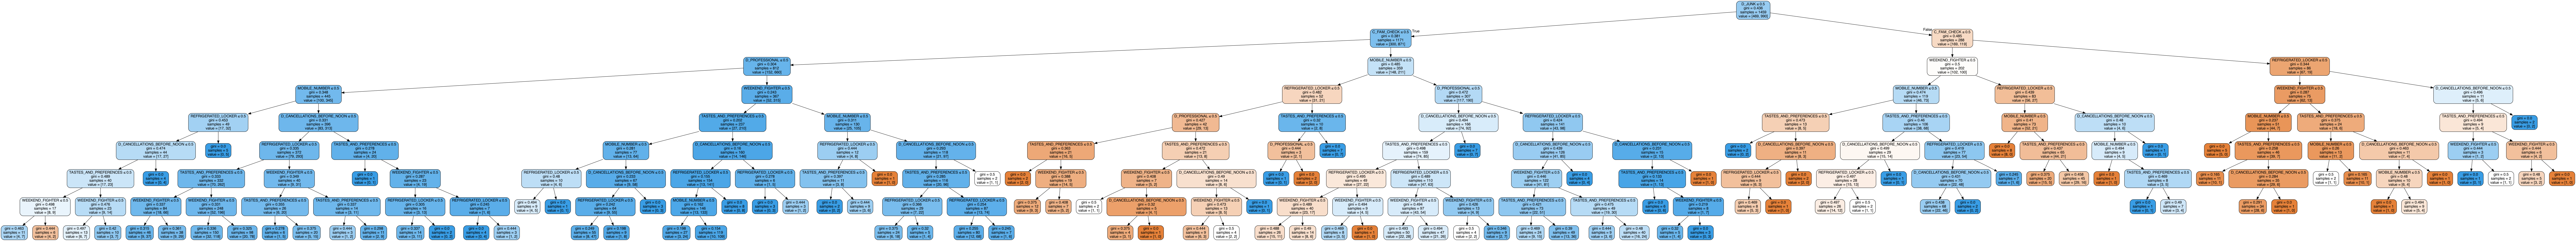

In [42]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = x_train)

# Pruned Tree

1. BASE MODEL to be used

In [43]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)

# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('GAP:', ((pruned_tree_fit.score(x_train, y_train).round(4)) - (pruned_tree_fit.score(x_test, y_test).round(4))).round(4))     
print('AUC Score : ', roc_auc_score(y_true = y_test,
                                          y_score = pruned_tree_pred).round(4))

# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc


Training ACCURACY: 0.7382
Testing  ACCURACY: 0.7166
GAP: 0.0216
AUC Score :  0.6068


In [44]:
#RESULTS
#Training ACCURACY: 0.7382
#Testing  ACCURACY: 0.7166
#GAP: 0.0216
#AUC Score :  0.6068

2. Creation of ALTERNATIVE models

In [45]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(criterion= "gini",
                                     #splitter = "best" ,
                                     max_depth = 8,
                                     min_samples_split = 2,
                                     min_samples_leaf = 25,
                                     min_weight_fraction_leaf = 0.0000000001,
                                     max_features = None,                   ##### Makes AUC go down 
                                     random_state = 219, 
                                     #max_leaf_nodes = 8,                   ###### Makes AUC go down
                                     #min_impurity_decrease = 0.0000005,    #      Does not make any difference
                                     #min_impurity_split = 0.0,             #      Does not make any difference
                                     #class_weight = None,    
                                     #presort = "deprecated",  
                                     #classes_ = n_classes,
                                     ccp_alpha = 0.00001,            
                                     #classes_ = 2,
                                     #feature_importances_ = 1000,
                                     #max_features_ = 40, #auto 
                                     #n_classes = 10,
                                     #n_features = 4 ,
                                     #n_outputs_ = 10, 
                                     #tree = Tree,
                                     )


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)

# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('GAP:              ', ((pruned_tree_fit.score(x_train, y_train).round(4)) - (pruned_tree_fit.score(x_test, y_test).round(4))).round(4) )
print('AUC Score:        ', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))

# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

#We're trying to reduce false negative
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()



Training ACCURACY: 0.7395
Testing  ACCURACY: 0.7248
GAP:               0.0147
AUC Score:         0.6298


In [46]:
#RESULTS
#Training ACCURACY: 0.7395
#Testing  ACCURACY: 0.7248
#GAP:               0.0147
#AUC Score        : 0.6298

3. Creation of a TABLE where we can compare the models

In [47]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


## sending model results to Excel
model_performance.to_excel('./Model_Performance_Table.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6698         (69, 87, 34, 297)
Full Tree     0.6513         (67, 89, 42, 289)
Pruned Tree   0.6298         (57, 99, 35, 296)



In [48]:
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.6698             0.7498            0.7515  (69, 87, 34, 297)
1    Full Tree     0.6513             0.7608            0.7310  (67, 89, 42, 289)
2  Pruned Tree     0.6298             0.7395            0.7248  (57, 99, 35, 296)

In [ ]:
#Up to this point the best model is the Logistic model, above the Full Tree and Pruned Tree
#even with the lowest False Negatives of all the model (not predicted customers maybe in this case
#which could be bad for a business if they do not predict well their demand)

# Hyper Parameter Tunning with Randomized Search CV

1. IMPORTING the necessary LIBRARIES

In [49]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import confusion_matrix         # confusion matrix

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

3. Running the BASE MODEL

In [94]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))
print('GAP              :', ((lr_default_fit.score(x_train, y_train).round(4)) - (lr_default_fit.score(x_test, y_test).round(4))).round(4) )


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7224
Testing  ACCURACY: 0.729
GAP              : -0.0066
AUC Score        : 0.6193


/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
#RESULTS
#Training ACCURACY: 0.7498
#Testing  ACCURACY: 0.7515
#GAP              : -0.0017
#AUC Score        : 0.6698

4. Creating TUNNED parameters for the model

In [52]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 1.4000000000000001}
Tuned CV AUC      : 0.664


6. TRYING the model with the BEST ESTIMATOR PARAMETERS

In [53]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C=1.4000000000000001, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=219, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


# FIT step is not needed
lr_tuned = lr_tuned.fit(x_train,y_train)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7498
Testing  ACCURACY: 0.7515
AUC Score        : 0.6698


In [95]:
#RESULTS
#Training ACCURACY: 0.7443
#Testing  ACCURACY: 0.7536
#AUC Score        : 0.6781

7. CONFUSSION matrix

In [55]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 69
False Positives: 87
False Negatives: 34
True Positives : 297



In [56]:
#True Negatives : 69
#False Positives: 87
#False Negatives: 34
#True Positives : 297


#This means, I've been better at predicting positive cases (promotions taken by clients)
#Type 1 errors increased (false positives)

8. SAVING results in the COMPARISON table

In [57]:
# loading model performance
model_performance = pd.read_excel('./Model_Performance_Table.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.6698             0.7498            0.7515  (69, 87, 34, 297)
1    Full Tree     0.6513             0.7608            0.7310  (67, 89, 42, 289)
2  Pruned Tree     0.6298             0.7395            0.7248  (57, 99, 35, 296)
3     Tuned LR     0.6698             0.7498            0.7515  (69, 87, 34, 297)

In [ ]:
#Comparing models we can see that the Logistic Model and the Tuned LR model are the tied in 
#being the best models

# Tunning on classification

1. Creating TUNNED parameters for the model

In [58]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = np.arange(1, 25, 1)
leaf_space      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 9, 'max_depth': 15, 'criterion': 'gini'}
Tuned Training AUC: 0.6571


In [59]:
#Results
#Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 9, 'max_depth': 15, 'criterion': 'gini'}
#Tuned Training AUC: 0.6571

2. TRYING the model with the TUNNED parameters

In [60]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7505
Testing  ACCURACY: 0.7495
AUC Score        : 0.6683


In [61]:
#Results
#Training ACCURACY: 0.7505
#Testing  ACCURACY: 0.7495
#AUC Score        : 0.6683

#AUC score is better than in other models, but still not the best one

In [62]:
# unpacking the confusion matrix
tuned_tree_tn,\
tuned_tree_fp,\
tuned_tree_fn,\
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred =tree_tuned_pred).ravel()

3. SAVING the model into the COMPARISON TABLE

In [63]:
#DEFINE MODEL_PERFORMANCE

# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.6698             0.7498            0.7515  (69, 87, 34, 297)
1    Full Tree     0.6513             0.7608            0.7310  (67, 89, 42, 289)
2  Pruned Tree     0.6298             0.7395            0.7248  (57, 99, 35, 296)
3     Tuned LR     0.6698             0.7498            0.7515  (69, 87, 34, 297)
4   Tuned Tree     0.6683             0.7505            0.7495  (69, 87, 35, 296)

In [ ]:
#Comparing our last model, we can see that the AUC score is reeally close as to the best models 
#(Logistic and Tuned LR), but when looking at the confussion matrix we can make the decision of
#not taking it as the predictions are slightly lower as well

4. DISPLAYING the tree

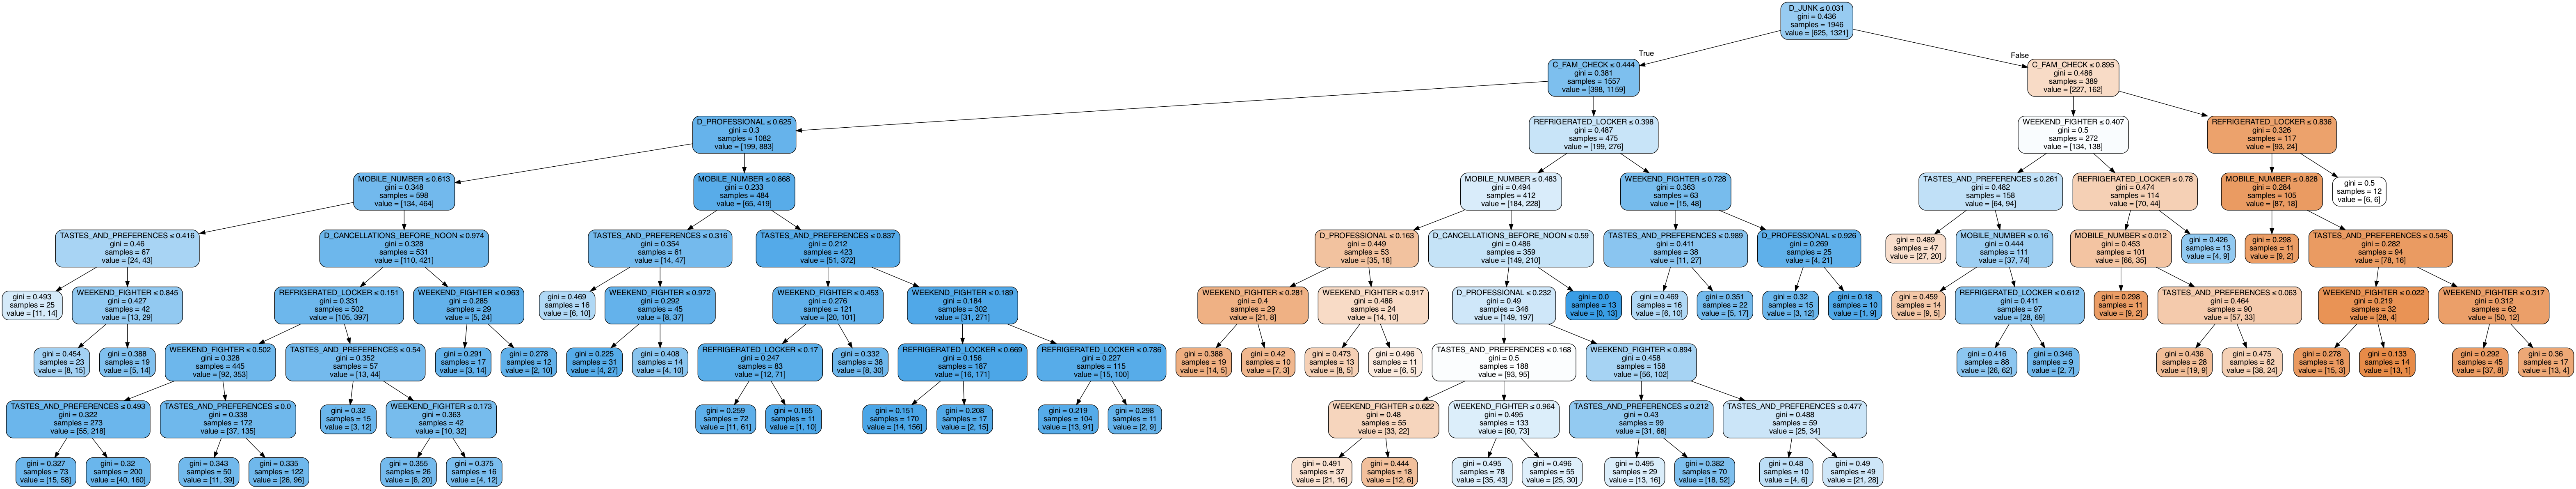

In [64]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = chef_data,
             height = 1500,
             width  = 1500)

# Random Forest / Ensamble Modeling

1. IMPORTING the necessary LIBRARIES

In [65]:
# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

2. UDF for the MODEL

In [66]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

3. TRAIN / TEST / SPLIT for the variable 

Ojo que acá estoy usando el full dataset

In [67]:
# train/test split with the logit_full variables
titanic_data   =  chef.loc[ : , candidate_dict['logit_full']]
titanic_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = titanic_target)

4. CREATING a BASE MODEL

In [68]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7248
AUC Score        : 0.6213


In [69]:
#Results
#Training ACCURACY: 1.0
#Testing  ACCURACY: 0.7248
#AUC Score        : 0.6213
#Not a good model for us

5. PLOTTING the important features for the model

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


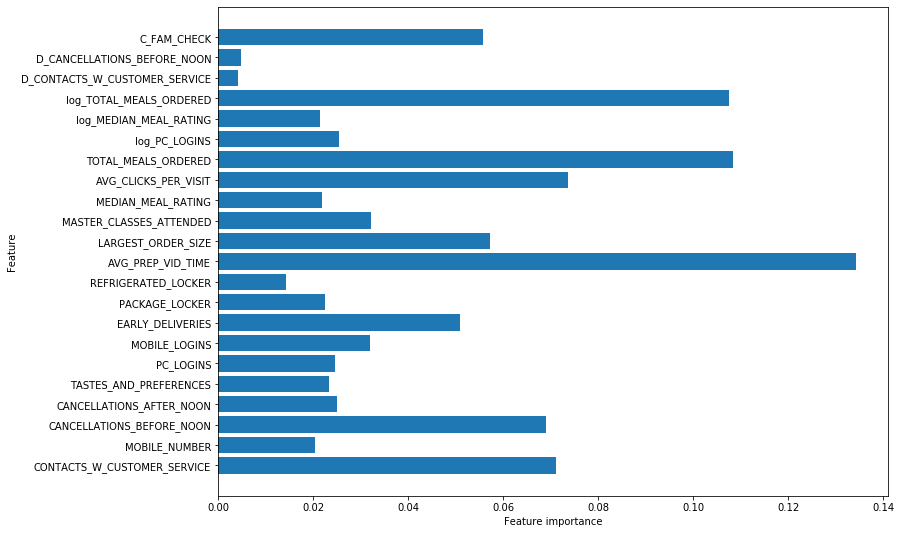

In [70]:
# plotting feature importances 
plot_feature_importances(model = rf_default_fit, train = x_train)

In [ ]:
#If we compare this model to the first correlation graphs with our y variable, we could see why this is 
#not the most suitable model (correlations are different)

6. CONFUSSION matrix

In [71]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 30
True Positives : 301



In [96]:
#RESULTS
#True Negatives : 52
#False Positives: 104
#False Negatives: 30
#True Positives : 301

7. ADDING to the COMPARISON TABLE 

DON'T RUN THE FOLLOWING ONE, IS THE TABLE I NEED TO CREATE

In [73]:

# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0              Logistic     0.6698             0.7498            0.7515   (69, 87, 34, 297)
1             Full Tree     0.6513             0.7608            0.7310   (67, 89, 42, 289)
2           Pruned Tree     0.6298             0.7395            0.7248   (57, 99, 35, 296)
3              Tuned LR     0.6698             0.7498            0.7515   (69, 87, 34, 297)
4            Tuned Tree     0.6683             0.7505            0.7495   (69, 87, 35, 296)
5  Random Forest (Full)     0.6213             1.0000            0.7248  (52, 104, 30, 301)

In [ ]:
#We can see that our best model keeps being Logistic and Tuned LR

# Tunned Random Forest 

1. Creating the TUNNED MODEL

In [75]:
# building a model based on hyperparameter tuning results

#Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': False}
#Tuned Training AUC: 0.5895



# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(
                                     bootstrap=False, 
                                     ccp_alpha=0.0, 
                                     class_weight=None,
                                     criterion='entropy', 
                                     max_depth=None, 
                                     max_features='auto',
                                     max_leaf_nodes=None, 
                                     max_samples=None,
                                     min_impurity_decrease=0.0, 
                                     min_impurity_split=None,
                                     min_samples_leaf=1, 
                                     min_samples_split=2,
                                     min_weight_fraction_leaf=0.0, 
                                     n_estimators=350,
                                     n_jobs=None, 
                                     oob_score=False, 
                                     random_state=219,
                                     verbose=0, 
                                     warm_start=True    
                                     )

# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 1.0
Forest Tuned Testing  ACCURACY: 0.7084
Forest Tuned AUC Score        : 0.6194


In [76]:
#RESULTS
#Forest Tuned Training ACCURACY: 1.0
#Forest Tuned Testing  ACCURACY: 0.7084
#Forest Tuned AUC Score        : 0.6194
#Accuracy demonstrates that the model is overfitted

2. PLOTTING the distribution of the variables importance

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


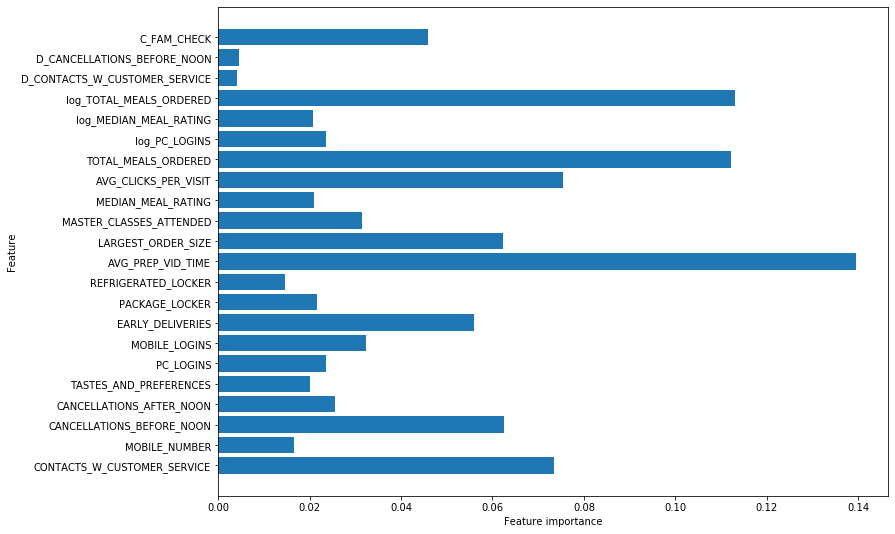

In [77]:
#plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [ ]:
#Same as with the graph above,if we compared the correlations with the variables, we could see why this is
#not the most optimal model

5. CONFUSSION Matrix

In [78]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 58
False Positives: 98
False Negatives: 44
True Positives : 287



6. ADDING results to the model

In [79]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6698             0.7498            0.7515   (69, 87, 34, 297)
1                   Full Tree     0.6513             0.7608            0.7310   (67, 89, 42, 289)
2                 Pruned Tree     0.6298             0.7395            0.7248   (57, 99, 35, 296)
3                    Tuned LR     0.6698             0.7498            0.7515   (69, 87, 34, 297)
4                  Tuned Tree     0.6683             0.7505            0.7495   (69, 87, 35, 296)
5        Random Forest (Full)     0.6213             1.0000            0.7248  (52, 104, 30, 301)
6  Tuned Random Forest (Full)     0.6194             1.0000            0.7084   (58, 98, 44, 287)

In [97]:
#Still no other models have added too much value to the variables selected

# Gradient Boosted Machines (GBM)

1. CREATING a BASE MODEL

In [80]:
####
#https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/tree/_splitter.pyx

####
#https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/tree/_splitter.pyx

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.17,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 2,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('GAP:', ((full_gbm_default_fit.score(x_train, y_train).round(4)) - (full_gbm_default_fit.score(x_test, y_test).round(4))).round(4))
print('AUC :', roc_auc_score(y_true  = y_test,
                             y_score = full_gbm_default_pred).round(4))


Training ACCURACY: 0.7745
Testing ACCURACY : 0.7269
GAP: 0.0476
AUC : 0.6279


In [81]:
#Training ACCURACY: 0.7745
#Testing ACCURACY : 0.7269
#GAP: 0.0476
#AUC : 0.6279

2. CONFUSSION matrix

In [82]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 55
False Positives: 101
False Negatives: 32
True Positives : 299



In [83]:
#Results log5
#True Negatives : 55
#False Positives: 101
#False Negatives: 32
#True Positives : 299

3. ADDING values to the COMPARISON TABLE
DONT RUN NEXT ONE

In [84]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6698             0.7498            0.7515   (69, 87, 34, 297)
1                   Full Tree     0.6513             0.7608            0.7310   (67, 89, 42, 289)
2                 Pruned Tree     0.6298             0.7395            0.7248   (57, 99, 35, 296)
3                    Tuned LR     0.6698             0.7498            0.7515   (69, 87, 34, 297)
4                  Tuned Tree     0.6683             0.7505            0.7495   (69, 87, 35, 296)
5        Random Forest (Full)     0.6213             1.0000            0.7248  (52, 104, 30, 301)
6  Tuned Random Forest (Full)     0.6194             1.0000            0.7084   (58, 98, 44, 287)
7                  GBM (Full)     0.6279             0.7745            0.7269  (55, 101, 32, 299)

3. OPTIMIZING the model by getting TUNNED PARAMETERS

In [85]:
#RESULTS
#Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 1.7000000000000004}
#Tuned Training AUC: 0.6645

4. Trying the OPTIMIZED parameters

In [86]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, 
                                       criterion='friedman_mse', 
                                       init=None,
                                       learning_rate=1.7000000000000004, 
                                       loss='deviance',
                                       max_depth=1, 
                                       max_features=None, 
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, 
                                       min_impurity_split=None,
                                       min_samples_leaf=1, 
                                       min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, 
                                       n_estimators=100,
                                       n_iter_no_change=None, 
                                       presort='deprecated',
                                       random_state=219, 
                                       subsample=1.0, 
                                       tol=0.0001,
                                       validation_fraction=0.1, 
                                       verbose=0,
                                       warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))


Training ACCURACY: 0.7416
Testing  ACCURACY: 0.6899
AUC Score        : 0.6024


In [87]:
#After tunned parameters
#Training ACCURACY: 0.7416
#Testing  ACCURACY: 0.6899
#AUC Score        : 0.6024

5. CONFUSSION matrix

In [88]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")



True Negatives : 56
False Positives: 100
False Negatives: 51
True Positives : 280



In [98]:
#This model shows a clear increase of false positives, meaning that we didn't predicted well 
#what kind of customers where going to take the promo (we predicted they did, and they didn't)

7. SHOWING the COMPARISON TABLE with the rest if the models

In [89]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6698             0.7498            0.7515   (69, 87, 34, 297)
3                    Tuned LR     0.6698             0.7498            0.7515   (69, 87, 34, 297)
4                  Tuned Tree     0.6683             0.7505            0.7495   (69, 87, 35, 296)
1                   Full Tree     0.6513             0.7608            0.7310   (67, 89, 42, 289)
2                 Pruned Tree     0.6298             0.7395            0.7248   (57, 99, 35, 296)
7                  GBM (Full)     0.6279             0.7745            0.7269  (55, 101, 32, 299)
5        Random Forest (Full)     0.6213             1.0000            0.7248  (52, 104, 30, 301)
6  Tuned Random Forest (Full)     0.6194             1.0000            0.7084   (58, 98, 44, 287)

This last model show us how our best model is the Logistic model, even though when this model is
not the best at minimizing the false negatives (promos not taken when they actually did take them), but
in this case that is not relevant as we're talking about promos. On the other hand, we want to reduce the
false positives (people we predicted they would take it and they didn't), as that is what we should be looking
at to improve, and that is to what the Logistic model is good at. 

8. SAVING the COMPARISON TABLE into our excel
Do not run yet

In [99]:
# saving the DataFrame to Excel
model_performance.to_excel('./Model_Performance_Table.xlsx',
                           index = False)